In [54]:
!git clone https://github.com/charvishukla/cse151a-pokemon-project.git

fatal: destination path 'cse151a-pokemon-project' already exists and is not an empty directory.


# Imports 

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading Datasets:

In [76]:
# IMPORT DATASET HERE
pokemon_datamined = pd.read_csv("pokemon_datamined_dataset.csv")
pokemon_datamined.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [77]:
pokemon_TCG= pd.read_csv("pokemon-tcg-dataset(1999-2023).csv")
pokemon_TCG.describe()

,hp,convertedRetreatCost
count,14536.000000,13678.000000
mean,104.839708,1.699664
std,61.041205,0.866636
min,10.000000,1.000000
25%,60.000000,1.000000
50%,80.000000,1.000000
75%,130.000000,2.000000
max,340.000000,5.000000


In [78]:
price_guide = pd.read_csv("price-guide.csv", low_memory=False)
price_guide.columns
price_guide.describe()

,id,gamestop-price,gamestop-trade-price,upc,sales-volume,genre,asin,epid
count,6.029600e+04,0.0,0.0,1.000000e+00,60296.000000,0.0,0.0,0.0
mean,3.126286e+06,NaN,NaN,8.206501e+11,37.243996,NaN,NaN,NaN
std,2.003219e+06,NaN,NaN,NaN,111.923299,NaN,NaN,NaN
min,2.522800e+04,NaN,NaN,8.206501e+11,1.000000,NaN,NaN,NaN
25%,9.592028e+05,NaN,NaN,8.206501e+11,2.000000,NaN,NaN,NaN
50%,3.457958e+06,NaN,NaN,8.206501e+11,7.000000,NaN,NaN,NaN
75%,4.614387e+06,NaN,NaN,8.206501e+11,23.000000,NaN,NaN,NaN
max,7.747398e+06,NaN,NaN,8.206501e+11,11000.000000,NaN,NaN,NaN


# Exploratory Data Analysis: Price Guide Dataset

Note that the price guide dataset was scraped from the internet using the price charting API available with a premium Price Charts Subscription. We scraped 60296 examples with 27 features (i.e. 60296 rows and 27 columns). 

In [79]:
print("Dataset Shape ", price_guide.shape)

Dataset Shape  (60296, 27)


We will begin by exploring the data types of all columns in the price_guide DataFrame. 

In [80]:
price_guide.columns

Index(['id', 'console-name', 'product-name', 'loose-price', 'cib-price',
       'new-price', 'graded-price', 'box-only-price', 'manual-only-price',
       'bgs-10-price', 'condition-17-price', 'condition-18-price',
       'gamestop-price', 'gamestop-trade-price', 'retail-loose-buy',
       'retail-loose-sell', 'retail-cib-buy', 'retail-cib-sell',
       'retail-new-buy', 'retail-new-sell', 'upc', 'sales-volume', 'genre',
       'tcg-id', 'asin', 'epid', 'release-date'],
      dtype='object')

### Number of Null rows

We need to determine the number of entries in each column. This will help us reason about which columns are the best to keep based on their values. To do so, we will use the `.isna()` function from Pandas Library. 

In [81]:
print('Number of null rows by column name:')
print('id', price_guide['id'].isna().sum())
print('console-name', price_guide['console-name'].isna().sum())
print('product-name', price_guide['product-name'].isna().sum())
print('loose-price', price_guide['loose-price'].isna().sum())
print('cib-price', price_guide['cib-price'].isna().sum())
print('new-price', price_guide['new-price'].isna().sum())
print('graded-price', price_guide['graded-price'].isna().sum())
print('box-only-price', price_guide['box-only-price'].isna().sum())
print('manual-only-price', price_guide['manual-only-price'].isna().sum())
print('bgs-10-price', price_guide['bgs-10-price'].isna().sum())
print('condition-17-price', price_guide['condition-17-price'].isna().sum())
print('condition-18-price', price_guide['condition-18-price'].isna().sum())
print('gamestop-price', price_guide['gamestop-price'].isna().sum())
print('gamestop-trade-price', price_guide['gamestop-trade-price'].isna().sum())
print('retail-loose-buy', price_guide['retail-loose-buy'].isna().sum())
print('retail-loose-sell', price_guide['retail-loose-sell'].isna().sum())
print('retail-cib-buy', price_guide['retail-cib-buy'].isna().sum())
print('retail-cib-sell', price_guide['retail-cib-sell'].isna().sum())
print('retail-new-buy', price_guide['retail-new-buy'].isna().sum())
print('retail-new-sell', price_guide['retail-new-sell'].isna().sum())
print('upc', price_guide['upc'].isna().sum())
print('sales-volume', price_guide['sales-volume'].isna().sum())
print('genre', price_guide['genre'].isna().sum())
print('tcg-id', price_guide['tcg-id'].isna().sum())
print('asin', price_guide['asin'].isna().sum())
print('epid', price_guide['epid'].isna().sum())
print('release-date', price_guide['release-date'].isna().sum())


Number of null rows by column name:
id 0
console-name 0
product-name 0
loose-price 6021
cib-price 49388
new-price 42160
graded-price 23691
box-only-price 23446
manual-only-price 23412
bgs-10-price 23397
condition-17-price 23155
condition-18-price 23402
gamestop-price 60296
gamestop-trade-price 60296
retail-loose-buy 39523
retail-loose-sell 6021
retail-cib-buy 49912
retail-cib-sell 49388
retail-new-buy 42659
retail-new-sell 42160
upc 60295
sales-volume 0
genre 60296
tcg-id 29622
asin 60296
epid 60296
release-date 4616


We will be dropping the following columns as they contain all (`genre` , `asin`,`epid` , `gamestop-price`), or over 40k null values (`retail-cib-buy`, `retail-new-sell`, `retail-new-buy`, `retail-cib-sell`). We have also set the `inplace` parameter to `True` because we do not want to make another copy of this dataframe in memory. 

In [82]:
price_guide.drop(columns=['gamestop-trade-price', 
                          'gamestop-price', 'cib-price', 'new-price',
                          'retail-cib-buy', 
                          'retail-new-sell', 
                          'retail-new-buy', 'retail-cib-sell', 
                         'asin', 'epid', 'genre', 'upc'], inplace=True)

Now, in the updated dataframe, we will drop any rows that still have null values present. This leaves us with 7789 observations and 15 features. 

In [83]:
price_guide.dropna(axis=0, how='any', inplace=True)
price_guide

,id,console-name,product-name,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price,retail-loose-buy,retail-loose-sell,sales-volume,tcg-id,release-date
2792,7418473,Pokemon 2010 World Collection,Pikachu [English],$60.00,$60.29,$66.00,$124.10,$186.00,$161.00,$74.00,$26.40,$65.99,27,215153,2010-07-08
2808,962237,Pokemon 2020 Battle Academy,Charizard #3,$4.25,$19.31,$21.00,$32.41,$49.00,$42.00,$19.00,$0.90,$4.69,18,175270,2018-09-07
2971,1420024,Pokemon Alolan Sandslash & Ninetales,Alolan Sandslash #30,$4.51,$85.00,$94.00,$102.00,$153.00,$133.00,$61.00,$1.00,$4.99,6,168220,2018-06-01
3001,959105,Pokemon Ancient Origins,Ampharos EX #87,$9.77,$32.76,$36.00,$109.86,$165.00,$143.00,$66.00,$2.80,$10.99,139,101509,2015-08-12
3031,959117,Pokemon Ancient Origins,Energy Retrieval #99,$19.99,$20.50,$23.00,$58.90,$88.00,$77.00,$35.00,$6.60,$21.99,228,101521,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,886727,Pokemon XY,Skarmory EX #145,$6.50,$41.25,$45.00,$1042.92,$1564.00,$1356.00,$626.00,$1.40,$7.19,27,89249,2014-02-05
60262,886723,Pokemon XY,Venusaur EX #141,$23.71,$106.88,$118.00,$188.90,$283.00,$246.00,$113.00,$7.80,$25.99,122,90325,2014-02-05
60281,886728,Pokemon XY,Xerneas EX #146,$15.92,$50.60,$56.00,$82.16,$123.00,$107.00,$49.00,$4.50,$17.99,74,90672,2014-02-05
60286,886726,Pokemon XY,Yveltal EX #144,$16.00,$50.00,$55.00,$60.00,$90.00,$78.00,$36.00,$4.50,$17.99,84,90700,2014-02-05


# Price Formatting conversion

Currently, all the prices in our dataset are stored as a string of the format: $\[some number\]. In order to conduct our exploratory data analysis, we will need convert such strings to floating point numbers. To do this, we have implemented the `stringtoint` function below and have applied it to columns that are also listed below:

In [84]:
def stringtoint(string):
    new_string = string[1:]
    return float(new_string)

columns_to_convert = ['loose-price', 
                      'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'condition-17-price', 
                      'condition-18-price', 'retail-loose-buy', 
                      'retail-loose-sell']

for col in columns_to_convert:
    price_guide[col] = price_guide[col].apply(stringtoint)


price_guide.dtypes, price_guide

(id                      int64
 console-name           object
 product-name           object
 loose-price           float64
 graded-price          float64
 box-only-price        float64
 manual-only-price     float64
 bgs-10-price          float64
 condition-17-price    float64
 condition-18-price    float64
 retail-loose-buy      float64
 retail-loose-sell     float64
 sales-volume            int64
 tcg-id                 object
 release-date           object
 dtype: object,
             id                          console-name          product-name  \
 2792   7418473         Pokemon 2010 World Collection     Pikachu [English]   
 2808    962237           Pokemon 2020 Battle Academy          Charizard #3   
 2971   1420024  Pokemon Alolan Sandslash & Ninetales  Alolan Sandslash #30   
 3001    959105               Pokemon Ancient Origins       Ampharos EX #87   
 3031    959117               Pokemon Ancient Origins  Energy Retrieval #99   
 ...        ...                              

In [87]:
price_guide_sub = price_guide[columns_to_convert].copy()  # Ensure it's a copy
price_guide_sub.loc[:, 'sales-volume'] = price_guide['sales-volume']
price_guide_sub

,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price,retail-loose-buy,retail-loose-sell,sales-volume
2792,60.00,60.29,66.0,124.10,186.0,161.0,74.0,26.4,65.99,27
2808,4.25,19.31,21.0,32.41,49.0,42.0,19.0,0.9,4.69,18
2971,4.51,85.00,94.0,102.00,153.0,133.0,61.0,1.0,4.99,6
3001,9.77,32.76,36.0,109.86,165.0,143.0,66.0,2.8,10.99,139
3031,19.99,20.50,23.0,58.90,88.0,77.0,35.0,6.6,21.99,228
...,...,...,...,...,...,...,...,...,...,...
60216,6.50,41.25,45.0,1042.92,1564.0,1356.0,626.0,1.4,7.19,27
60262,23.71,106.88,118.0,188.90,283.0,246.0,113.0,7.8,25.99,122
60281,15.92,50.60,56.0,82.16,123.0,107.0,49.0,4.5,17.99,74
60286,16.00,50.00,55.0,60.00,90.0,78.0,36.0,4.5,17.99,84


# Pairplots

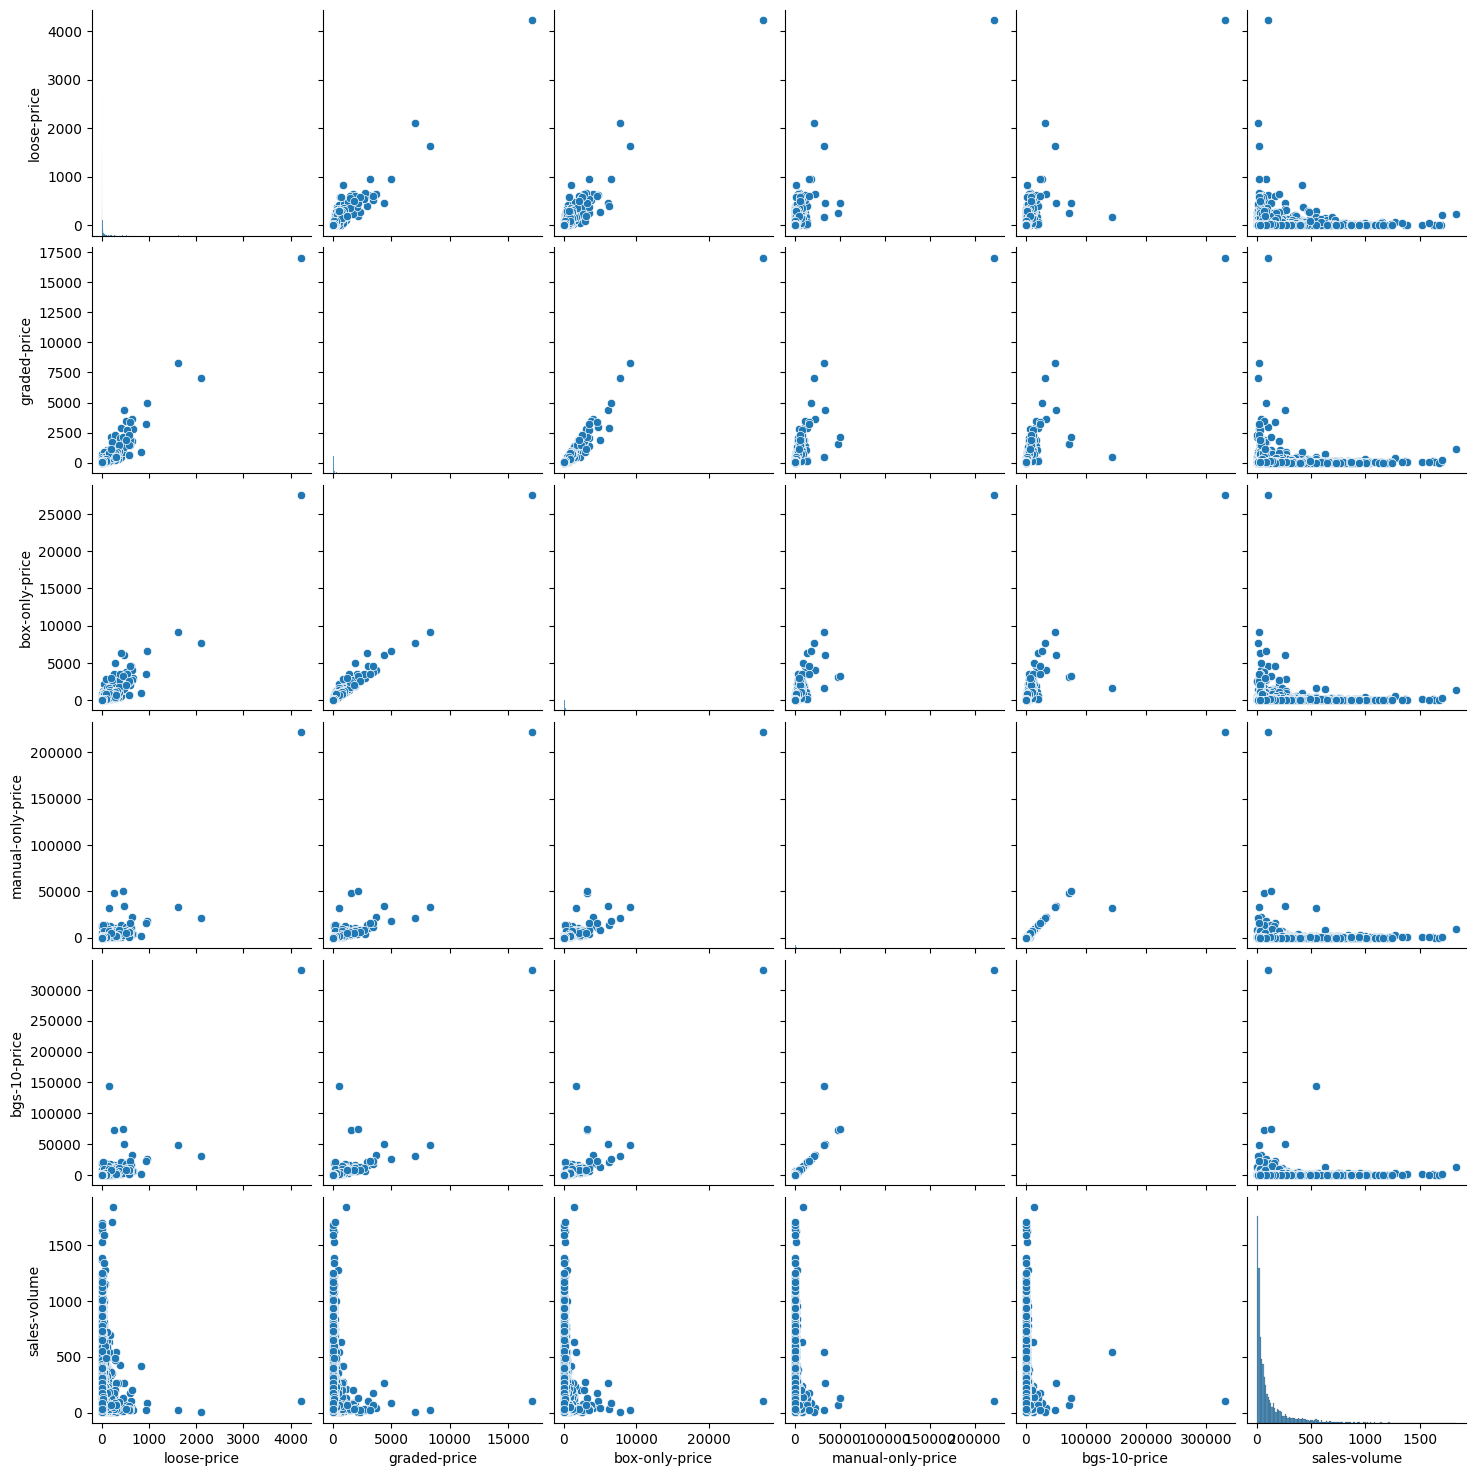

In [90]:
selected_columns = ['loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume']  
price_guide_subset = price_guide_sub[selected_columns]

sns.pairplot(price_guide_subset)
plt.show()

# Heatmap 

In [91]:
# Step 2: Correlation matrix heatmap with a different set of columns
columns_for_corr = price_guide.drop(columns=['condition-17-price', 
                                             'condition-18-price', 
                                             'retail-loose-buy', 
                                             'retail-loose-sell'])

corr_matrix = columns_for_corr.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.title("Correlation Matrix Heatmap")
plt.show()

ValueError: could not convert string to float: 'Pokemon 2010 World Collection'

In [68]:
print('Number of unique values in the console-name columns', price_guide['console-name'].nunique())
print('   ')
print('Top 3 uniquely occuring console-name values: ')
print(price_guide['console-name'].value_counts().head(4))

Number of unique values in the console-name columns 151
   
Top 3 uniquely occuring console-name values: 
console-name
Pokemon Promo         433
Pokemon Skyridge      259
Pokemon Aquapolis     258
Pokemon Expedition    244
Name: count, dtype: int64


In [69]:
new_columns_to_convert = ['loose-price', 'graded-price', 'box-only-price', 
                          'manual-only-price', 'bgs-10-price' 
                          'console-name']

price_guide_subset = price_guide[new_columns_to_convert]
top_three_consoles = price_guide_subset['console-name'].value_counts().head(3).index

# Use .loc to create the filtered DataFrame and avoid SettingWithCopyWarning
console_df = price_guide.loc[price_guide['console-name'].isin(top_three_consoles)].copy()
console_df['console-name'] = console_df['console-name'].astype('category')

# sns.pairplot(console_df, hue='console-name')


KeyError: "['bgs-10-priceconsole-name'] not in index"

In [ ]:
sns.pairplot(console_df, hue='console-name')